<a href="https://colab.research.google.com/github/codingwithmeow/Demand-Prediction/blob/main/Makale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries that most used

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Datayı yükleme

In [ ]:
aisles = pd.read_csv("/content/drive/MyDrive/makale/aisles.csv")
departments = pd.read_csv("/content/drive/MyDrive/makale/departments.csv")
order_products__train = pd.read_csv("/content/drive/MyDrive/makale/order_products__train.csv")
orders = pd.read_csv("/content/drive/MyDrive/makale/orders.csv")
products = pd.read_csv("/content/drive/MyDrive/makale/products.csv")

Train kısmını kullanıcağım için orders verisindeki train kısmını ayırıcam

In [ ]:
orders = orders[orders["eval_set"]=="train"]

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


Data inceleme

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Verileri birleştirme

In [ ]:
# merge 1 product_id etrafında products ve order_products_train
df1 = pd.merge(products,order_products__train,on="product_id")
df1.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1


In [ ]:
# merge 2 aisle_id etrafında oluşturulan df1 ile aisles
df2 = pd.merge(df1,aisles,on="aisle_id")
df2.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,cookies cakes
1,1,Chocolate Sandwich Cookies,61,19,48361,9,0,cookies cakes
2,1,Chocolate Sandwich Cookies,61,19,63770,4,0,cookies cakes
3,1,Chocolate Sandwich Cookies,61,19,75339,9,0,cookies cakes
4,1,Chocolate Sandwich Cookies,61,19,240996,3,1,cookies cakes


In [ ]:
# merge 3 order_id etrafında oluşturulan df2 ile orders
df3 = pd.merge(df2,orders,on="order_id")
df3.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,cookies cakes,1540,train,29,1,1,8.0
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,cookies cakes,1540,train,29,1,1,8.0
2,26317,Organic Lemonade,98,7,6695,11,1,juice nectars,1540,train,29,1,1,8.0
3,9007,Frosted Flakes,121,14,6695,9,1,cereal,1540,train,29,1,1,8.0
4,45051,Pub Mix,107,19,6695,6,1,chips pretzels,1540,train,29,1,1,8.0


In [ ]:
# merge 4 deparment_id etrafında oluşturulan df3 ile departments
df4 = pd.merge(df3,departments,on="department_id")
df4.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,cookies cakes,1540,train,29,1,1,8.0,snacks
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,cookies cakes,1540,train,29,1,1,8.0,snacks
2,45051,Pub Mix,107,19,6695,6,1,chips pretzels,1540,train,29,1,1,8.0,snacks
3,10310,Wheat Thins Original,78,19,6695,20,1,crackers,1540,train,29,1,1,8.0,snacks
4,37600,Organic Kettle Corn,23,19,6695,1,1,popcorn jerky,1540,train,29,1,1,8.0,snacks


# GÖRSELLEŞTİRME

Siparişleri ürünlere göre gruplandırıp, her bir ürünün kaç kez sipariş edildiğini görmek

In [ ]:
g = df4.product_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["product_id", "count"]
g_products = pd.merge(g,products,on="product_id")
g_products.head()

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4


<Figure size 5000x4000 with 0 Axes>

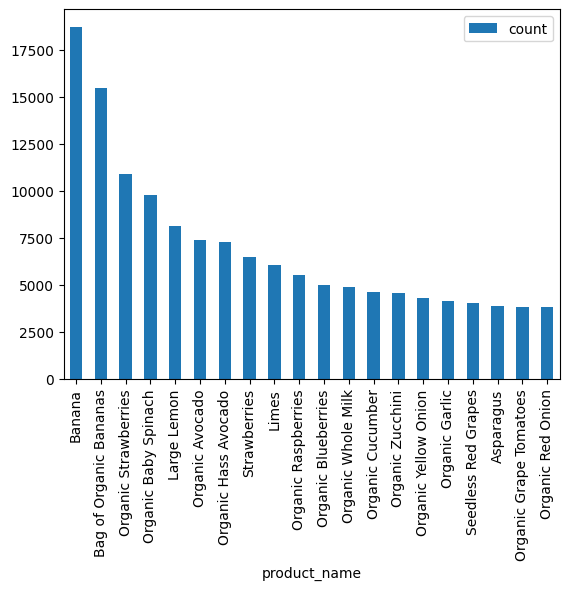

In [ ]:
plt.figure(figsize=(50, 40))
g_products.head(20).plot(kind="bar", x="product_name", y="count")
plt.show()

Departman başına sipariş sayısını bulun

In [ ]:
g = df4.department_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["department_id", "count"]
g_dept = pd.merge(g,departments,on="department_id")
g_dept.head()

,department_id,count,department
0,4,409087,produce
1,16,217051,dairy eggs
2,19,118862,snacks
3,7,114046,beverages
4,1,100426,frozen


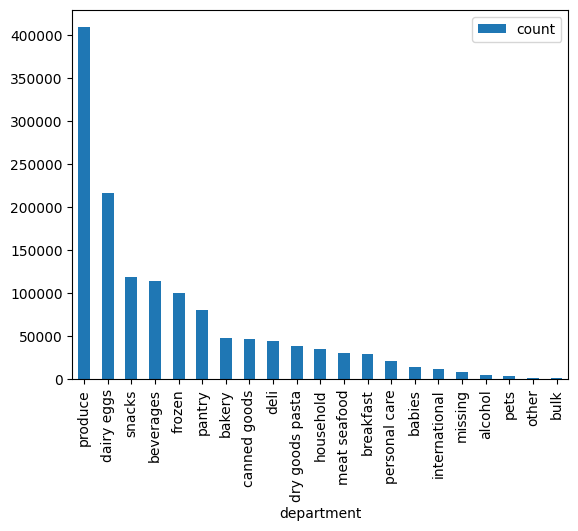

In [ ]:
g_dept.plot(kind="bar", x="department", y="count")
plt.show()

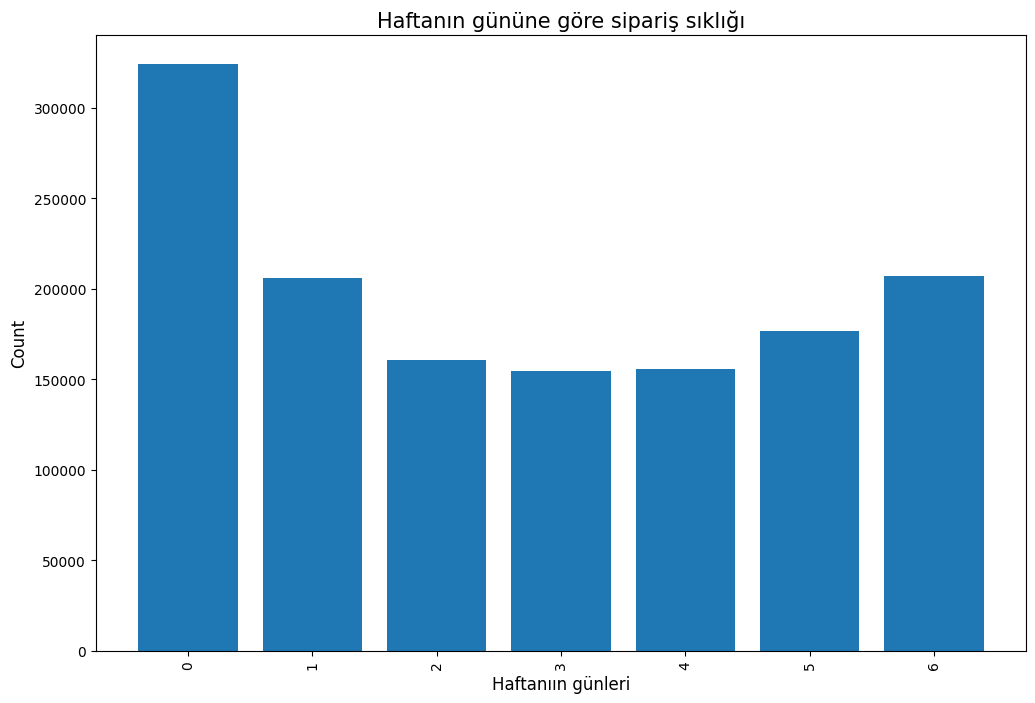

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(df4['order_dow'].value_counts().index, df4['order_dow'].value_counts().values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Haftanıın günleri', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Haftanın gününe göre sipariş sıklığı", fontsize=15)
plt.show()

Günün saatine göre sipariş sıklığı

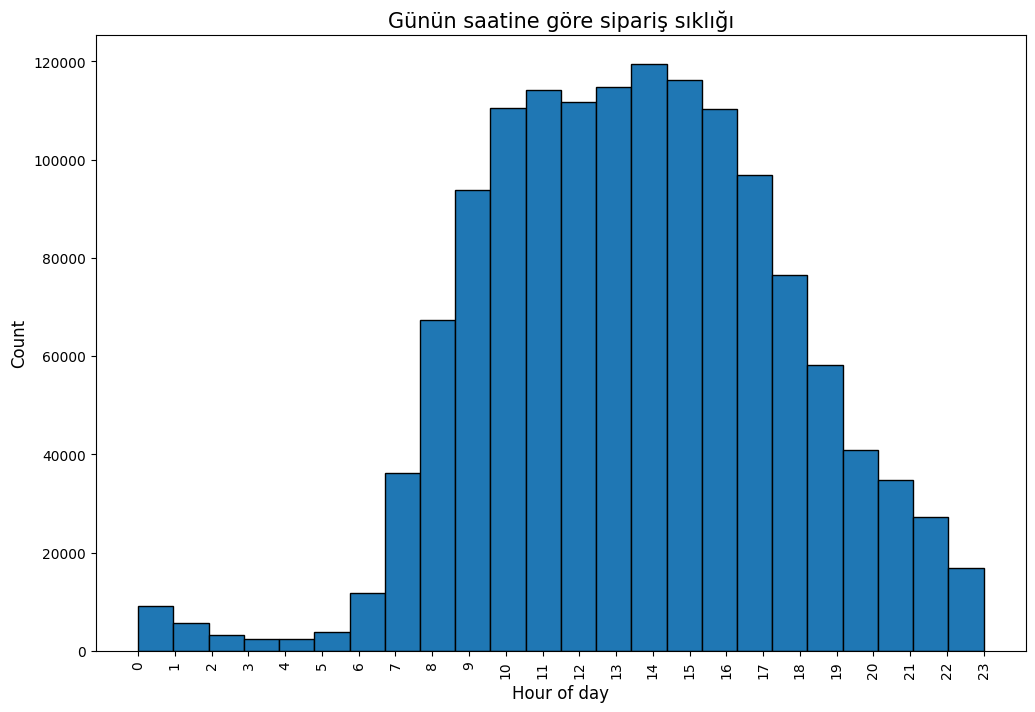

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df4['order_hour_of_day'], bins=24, edgecolor='black')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(range(24), rotation='vertical')
plt.title("Günün saatine göre sipariş sıklığı", fontsize=15)
plt.show()

Yeniden sipariş verilenler ürünler için histogram çizimi

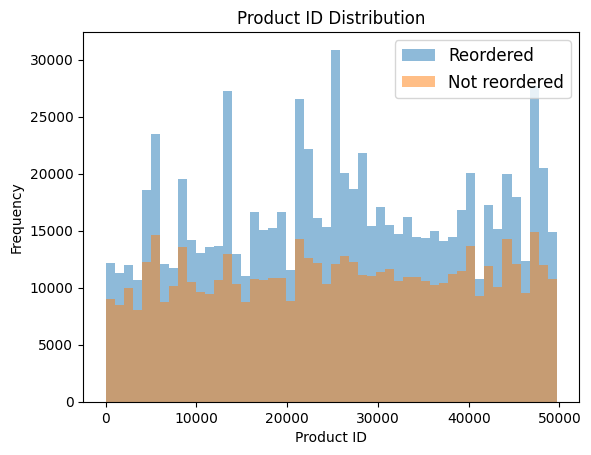

In [ ]:
plt.hist(df4[df4['reordered'] == 1]['product_id'], alpha=0.5, label='Reordered', bins=50)

# Plot histogram for products that were not reordered
plt.hist(df4[df4['reordered'] == 0]['product_id'], alpha=0.5, label='Not reordered', bins=50)

# Set legend and title
plt.legend(prop={'size': 12})
plt.title('Product ID Distribution')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.show()

# Verilerin bölünmesi

In [ ]:
Y = df4.iloc[:,6]
X = df4.drop(["product_name","reordered","aisle","eval_set","department"],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)


# Multi Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)
y_pred_lin = regressor_linear.predict(x_test)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_pred_lin,x_test)
print(model.fit().summary())

# R2 score
print("Linear regression sonucu R2 score =",r2_score(y_test,y_pred_lin))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.183e+06
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:41:05   Log-Likelihood:                      3.2644e+05
No. Observations:              456924   AIC:                                 -6.529e+05
Df Residuals:                  456914   BIC:                                 -6.528e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
mse = mean_squared_error(y_test, y_pred_lin)
rmse = mse**(0.5)
print("Linear regresyon MSE: %.2f" % mse)
print("Linear regresyon RMSE: %.2f" % rmse)

Linear regresyon MSE: 0.22
Linear regresyon RMSE: 0.47


# Polinomal

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_train)

x_poly_test = poly_reg.fit_transform(x_test)
y_pred_poly = lin_reg.predict(x_poly_test)

print(r2_score(y_test,y_pred_poly))


0.10163252684473523


In [ ]:
mse = mean_squared_error(y_test, y_pred_poly)
rmse = mse**(0.5)
print("Polinomal regresyon MSE: %.2f" % mse)
print("Polinomal regresyon RMSE: %.2f" % rmse)

Polinomal regresyon MSE: 0.22
Polinomal regresyon RMSE: 0.46


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_rdt=r_dt.predict(x_test)
print(y_pred_rdt)
print(r2_score(y_test,y_pred_rdt ))

[0. 0. 1. ... 0. 0. 1.]
-0.6284259356749669


In [ ]:
mse = mean_squared_error(y_test, y_pred_rdt)
rmse = mse**(0.5)
print("Decision tree regresyon MSE: %.2f" % mse)
print("Decision tree RMSE: %.2f" % rmse)

Decision tree regresyon MSE: 0.39
Decision tree RMSE: 0.63


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 10 ,random_state=0)
rf_reg.fit(x_train,y_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_rfr = rf_reg.predict(x_test)
print(y_pred_rfr)
print(r2_score(y_test,y_pred_rfr ))

[0.5 0.8 0.9 ... 0.6 0.6 0.8]
0.09180974194850577


In [ ]:
mse = mean_squared_error(y_test, y_pred_rfr)
rmse = mse**(0.5)
print("Random forest MSE: %.2f" % mse)
print("Random forest RMSE: %.2f" % rmse)

Random forest MSE: 0.22
Random forest RMSE: 0.47


# LIGHTGBM Denemeleri

Default değerlerle

In [ ]:
from lightgbm import LGBMClassifier
lgbm_de = LGBMClassifier()
lgbm_de.fit(x_train, y_train)
y_pred_de=lgbm_de.predict(x_test)

In [ ]:
print("LightGBM default değeri ile R2 score=",r2_score(y_test,y_pred_de))

mse = mean_squared_error(y_test, y_pred_de)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)


LightGBM default değeri ile R2 score= -0.3109487703937859
MSE: 0.31
RMSE: 0.56


In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred_de))

[[ 91697  91008]
 [ 52736 221483]]


Optimasyon değerleri ile

In [ ]:
from lightgbm import LGBMClassifier
lgbm_o = LGBMClassifier(learning_rate = 0.05,
                       max_depth = 15,
                       min_data_in_leaf = 10,
                       n_estimators = 1000,
                       subsample = 1)
lgbm_o.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


LGBMClassifier(learning_rate=0.05, max_depth=15, min_data_in_leaf=10,
               n_estimators=1000, subsample=1)

In [ ]:
y_pred_o=lgbm_o.predict(x_test)

print(r2_score(y_test,y_pred_o))

mse = mean_squared_error(y_test, y_pred_o)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.2878842289845731
MSE: 0.31
RMSE: 0.56


# Xgboost

Default değerleri ile

In [ ]:
from xgboost import XGBClassifier
xgb_class_default = XGBClassifier()
xgb_class_default.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xbg_class_default = xgb_class_default.predict(x_test)

print(r2_score(y_test,y_pred_xbg_class_default))

mse = mean_squared_error(y_test, y_pred_xbg_class_default)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.2949431277788517
MSE: 0.31
RMSE: 0.56


Xgboost Classifier optimasyon değerlerle

In [ ]:
from xgboost import XGBClassifier
xgb_class = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=np.nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)
xgb_class.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:

y_pred_xbg_o = xgb_class.predict(x_test)

print(r2_score(y_test,y_pred_xbg_o))

mse = mean_squared_error(y_test, y_pred_xbg_o)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.21684835985196793
MSE: 0.29
RMSE: 0.54


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


# Caatboost

Default

In [ ]:
from catboost import CatBoostClassifier, Pool
catboostd = CatBoostClassifier()
catboostd.fit(x_train, y_train)

y_pred_catboost_d=catboostd.predict(x_test)

Learning rate set to 0.190553
0:	learn: 0.6673095	total: 299ms	remaining: 4m 58s
1:	learn: 0.6504530	total: 756ms	remaining: 6m 17s
2:	learn: 0.6391764	total: 953ms	remaining: 5m 16s
3:	learn: 0.6313960	total: 1.15s	remaining: 4m 45s
4:	learn: 0.6246607	total: 1.36s	remaining: 4m 31s
5:	learn: 0.6202985	total: 1.57s	remaining: 4m 19s
6:	learn: 0.6174293	total: 2.03s	remaining: 4m 48s
7:	learn: 0.6150633	total: 2.43s	remaining: 5m 1s
8:	learn: 0.6132829	total: 2.77s	remaining: 5m 5s
9:	learn: 0.6114004	total: 3.12s	remaining: 5m 9s
10:	learn: 0.6102445	total: 3.49s	remaining: 5m 13s
11:	learn: 0.6093824	total: 3.94s	remaining: 5m 24s
12:	learn: 0.6075232	total: 4.59s	remaining: 5m 48s
13:	learn: 0.6066007	total: 5.1s	remaining: 5m 59s
14:	learn: 0.6059750	total: 5.73s	remaining: 6m 16s
15:	learn: 0.6047632	total: 6.25s	remaining: 6m 24s
16:	learn: 0.6042990	total: 6.7s	remaining: 6m 27s
17:	learn: 0.6038158	total: 7.05s	remaining: 6m 24s
18:	learn: 0.6028621	total: 7.43s	remaining: 6m 2

In [ ]:
print(r2_score(y_test,y_pred_catboost_d))

mse = mean_squared_error(y_test, y_pred_catboost_d)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.281153651064447
MSE: 0.31
RMSE: 0.55


Optimasyon

In [ ]:
from catboost import CatBoostClassifier, Pool
catboost_o = CatBoostClassifier(iterations = 500,
                          learning_rate = 0.1,
                          max_depth = 10,
                          save_snapshot=True,
                          snapshot_file="catboost_save",
                          early_stopping_rounds=50)
catboost_o.fit(x_train, y_train)

y_pred_catboost=catboost_o.predict(x_test)

0:	learn: 0.6770266	total: 406ms	remaining: 3m 22s
1:	learn: 0.6636607	total: 766ms	remaining: 3m 10s
2:	learn: 0.6530898	total: 1.12s	remaining: 3m 5s
3:	learn: 0.6446778	total: 1.49s	remaining: 3m 4s
4:	learn: 0.6374845	total: 1.85s	remaining: 3m 3s
5:	learn: 0.6316861	total: 2.41s	remaining: 3m 18s
6:	learn: 0.6270772	total: 3.06s	remaining: 3m 35s
7:	learn: 0.6231481	total: 3.71s	remaining: 3m 48s
8:	learn: 0.6197665	total: 4.32s	remaining: 3m 55s
9:	learn: 0.6168262	total: 4.98s	remaining: 4m 4s
10:	learn: 0.6145272	total: 5.61s	remaining: 4m 9s
11:	learn: 0.6123214	total: 6.24s	remaining: 4m 13s
12:	learn: 0.6106933	total: 6.87s	remaining: 4m 17s
13:	learn: 0.6090122	total: 7.29s	remaining: 4m 12s
14:	learn: 0.6078462	total: 7.64s	remaining: 4m 7s
15:	learn: 0.6066591	total: 8.01s	remaining: 4m 2s
16:	learn: 0.6054300	total: 8.36s	remaining: 3m 57s
17:	learn: 0.6045240	total: 8.73s	remaining: 3m 53s
18:	learn: 0.6038874	total: 9.08s	remaining: 3m 49s
19:	learn: 0.6032994	total: 9

In [ ]:
print(r2_score(y_test,y_pred_catboost))

mse = mean_squared_error(y_test, y_pred_catboost)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.27779748212866595
MSE: 0.31
RMSE: 0.55


In [ ]:
!pip install tensorflow


# LSTM modeli

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Veri setini normalleştirme
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
model.fit(x_train, y_train, epochs=50)

y_pred = model.predict(x_test)

# Modeli değerlendirme
_, accuracy = model.evaluate(np.expand_dims(x_test, axis=2), y_test)
print('Accuracy:', accuracy)


Epoch 1/50
28991/28991 [==============================] - 313s 10ms/step - loss: 0.6270 - accuracy: 0.6470
Epoch 2/50
28991/28991 [==============================] - 247s 9ms/step - loss: 0.6152 - accuracy: 0.6597
Epoch 3/50
28991/28991 [==============================] - 243s 8ms/step - loss: 0.6113 - accuracy: 0.6630
Epoch 4/50
28991/28991 [==============================] - 243s 8ms/step - loss: 0.6061 - accuracy: 0.6676
Epoch 5/50
28991/28991 [==============================] - 237s 8ms/step - loss: 0.6028 - accuracy: 0.6703
Epoch 6/50
28991/28991 [==============================] - 242s 8ms/step - loss: 0.6000 - accuracy: 0.6728
Epoch 7/50
28991/28991 [==============================] - 240s 8ms/step - loss: 0.5975 - accuracy: 0.6750
Epoch 8/50
28991/28991 [==============================] - 247s 9ms/step - loss: 0.5960 - accuracy: 0.6768
Epoch 9/50
28991/28991 [==============================] - 246s 8ms/step - loss: 0.5950 - accuracy: 0.6776
Epoch 10/50
28991/28991 [====================

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

0.15345011626475025
MSE: 0.20
RMSE: 0.45


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = (y_pred > 0.5).astype(int)

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 95417  87288]
 [ 58630 215589]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

# For LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Veri setini normalleştirme
scaler = MinMaxScaler()
s1 = MinMaxScaler(feature_range=(-1,1))
X = s1.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

X = np.array(X)
y_train = np.array(y_train)

X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

# Modeli eğitme
model.fit(x_train, y_train, epochs=50,batch_size = 250, callbacks=[es], verbose=1)

y_pred = model.predict(x_test)

Epoch 1/50
3711/3711 [==============================] - 412s 108ms/step - loss: 0.2343 - accuracy: 0.6092
Epoch 2/50
3711/3711 [==============================] - 376s 101ms/step - loss: 0.2179 - accuracy: 0.6508
Epoch 3/50
3711/3711 [==============================] - 344s 93ms/step - loss: 0.2166 - accuracy: 0.6541
Epoch 4/50
3711/3711 [==============================] - 323s 87ms/step - loss: 0.2156 - accuracy: 0.6558
Epoch 5/50
3711/3711 [==============================] - 323s 87ms/step - loss: 0.2147 - accuracy: 0.6579
Epoch 6/50
3711/3711 [==============================] - 329s 89ms/step - loss: 0.2137 - accuracy: 0.6595
Epoch 7/50
3711/3711 [==============================] - 346s 93ms/step - loss: 0.2122 - accuracy: 0.6631
Epoch 8/50
3711/3711 [==============================] - 332s 89ms/step - loss: 0.2111 - accuracy: 0.6653
Epoch 9/50
3711/3711 [==============================] - 315s 85ms/step - loss: 0.2104 - accuracy: 0.6668
Epoch 10/50
3711/3711 [==============================

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

0.15611342914538862
MSE: 0.20
RMSE: 0.45


# Feature Engine denemeleri

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# import selection classes from Feature-engine

from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
    ProbeFeatureSelection,
)

Costant variable yani sadece ayni değerden oluşan kolon var mı ve Quasi-constant variable yani gözlemlerin çoğunda ek bir değere sahip mi kontrol edilecek.

In [ ]:
# with tol=1 we tell the transformer to remove constant features
constant = DropConstantFeatures(tol=1)

# finds the constant features on the train set
constant.fit(x_train)

len(constant.features_to_drop_)


0

Yokmuş

Quasi-constant variable yani gözlemlerin çoğunda ek bir değere sahip mi kontrol edilecek. Burada %99 aynı değer var mı bakılacak.

In [ ]:
# with tol=0.99 we tell the transformer that we want to remove
# all features that show the same value in more than 99% of the
# observations in the dataset

quasi_constant = DropConstantFeatures(tol=0.99)

# find quasi-constant features in the train set
quasi_constant.fit(x_train)

len(constant.features_to_drop_)

0

Yokmuş

Dulicated variables = Her gözlem için aynı değerleri gösteriyorlarsa, yinelenenler olarak kabul edilirler.

In [ ]:
duplicates = DropDuplicateFeatures()

# find duplicated features in the train set
duplicates.fit(x_train)

duplicates.duplicated_feature_sets_

[]

Yokmuş

Correlated Features = ilişkili değişkenleri. Bu değişkenler var mı kontrolu yapılacak.

In [ ]:
# if variables is set to None, the transformer will examine all variables
# we can choose the correlation method to use (pearson, spearman or kendal)
# and the correlation threshold

correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

# find correlated variables in the train set
correlated.fit(x_train)

correlated.correlated_feature_sets_

[]

Bulamadı.

SelectByShuffling(), değerlerinin rastgele permütasyonu model performansını düşürüyorsa önemli özellikleri seçer. Özellik tahmine dayalıysa, değerlerin satırlar boyunca rastgele karıştırılması, doğru olmayan tahminler döndürmelidir. Özellik tahmine dayalı değilse, değerlerinin tahmin üzerinde minimum bir etkiye sahip olması gerekir.

Algoritma şu şekilde çalışır:

1. Tüm özellikleri kullanarak bir makine öğrenimi modeli eğitin

2. Tercih edilen bir model performans metriğini belirleyin

3. 1 özellik değerlerinin sırasını karıştırın

4. Yeni tahminler elde etmek için 1'de eğitilen modeli kullanın

5. 4'teki tahminlerle performansı belirleyin

6. Performansta bir eşiğin ötesinde bir düşüş olursa, özelliği koruyun.

7. Tüm özellikler incelenene kadar 3-6 tekrarlayın.



In [ ]:
linear_model = LinearRegression()

shuffle_lin_reg = SelectByShuffling(estimator=linear_model, scoring="r2", cv=5)

shuffle_lin_reg.fit(x_train,y_train)

shuffle_lin_reg.initial_model_performance_

len(shuffle_lin_reg.features_to_drop_)


8

In [ ]:
# remove variables

print('Number of variables before removing non important: ', x_train.shape[1])

x_train_lr_shuf = shuffle_lin_reg.transform(x_train)
x_test_lr_shuf = shuffle_lin_reg.transform(x_test)

print('Number of variables after removing non important: ', x_train_lr_shuf.shape[1])

Number of variables before removing non important:  10
Number of variables after removing non important:  2


In [ ]:
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()

regressor_linear.fit(x_train_lr_shuf, y_train)
y_pred_lin = regressor_linear.predict(x_test_lr_shuf)

# R2 score
print("Linear regression sonucu R2 score =",r2_score(y_test,y_pred_lin, force_finite=False))

Linear regression sonucu R2 score = 0.0730663669886823


shuffle metodu linear regressyon sonucu r^2 değeri düştü.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_lin)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 0.22
RMSE: 0.47


Linear regresyon MSE: 0.22
Linear regresyon RMSE: 0.47
idi bunlar aynı kalmış

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_pred_lin,x_test_lr_shuf)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                          4.424e+05
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:01:58   Log-Likelihood:                     -1.7835e+05
No. Observations:              456924   AIC:                                  3.567e+05
Df Residuals:                  456922   BIC:                                  3.567e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Polinom regresyon sonuçlarına bakılınca
Hata veriyor düzeltemiyorum

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x_train)

lin_regre = LinearRegression()
shuffle_pol_reg = SelectByShuffling(estimator=lin_regre,scoring="r2", cv=5)

shuffle_pol_reg.fit(x_poly,y_train)

X_poly = shuffle_pol_reg.transform(x_poly)
X_test = shuffle_pol_reg.transform(poly_reg.fit_transform(x_test))

poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_poly)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)

y_pred_poly= lin_reg.predict(X_test)

print(r2_score(y_test,y_pred_poly))

Decision Tree ile Feature engine


In [ ]:
shuffle = SelectByShuffling(
    estimator = DecisionTreeRegressor(max_depth=2, random_state=1), # the model
    scoring="r2", # the metric to determine model performance
    cv=3, # the cross-validation fold
)

In [ ]:
x_train_shuffle_dec= shuffle.transform(x_train)
x_test_shuffle_dec= shuffle.transform(x_test)

2

In [ ]:
estimator = DecisionTreeRegressor(max_depth=2, random_state=0)
estimator.fit(x_train_shuffle_dec,y_train)

y_pred_shuffle_dec = estimator.predict(x_test_shuffle_dec)

print(r2_score(y_test,y_pred_shuffle_dec))


0.07292997204308216


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_shuffle_dec)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 0.22
RMSE: 0.47


Karar ağacı r2 scoru - değerlerden 0.072 ye artmış. mse ve RMSE değerleride azalmış o zaman başarılı

Randm Forest ile Feature engine


In [ ]:
shuffle = SelectByShuffling(
    estimator = RandomForestRegressor(n_estimators=10, random_state=0), # the model
    scoring="r2", # the metric to determine model performance
    cv=3, # the cross-validation fold
)

shuffle.fit(x_train, y_train)

SelectByShuffling(estimator=RandomForestRegressor(n_estimators=10,
                                                  random_state=0),
                  scoring='r2')

In [ ]:
X_train = shuffle.transform(x_train)
X_test = shuffle.transform(x_test)


In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 10 ,random_state=0)

rf.fit(X_train, y_train)

y_pred_shuffle_rf = rf.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred_shuffle_rf))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_shuffle_rf)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)


-0.4448672069508759
MSE: 0.35
RMSE: 0.59


R2 değeri - lerde kaldı ama arttı mse ve rmse düştü.

Lightgbm ve Feature engine

In [ ]:
shuffle = SelectByShuffling(
    estimator = LGBMClassifier(learning_rate= 0.05, max_depth=15, min_data_in_leaf=10, n_estimators=1000,subsample=1), # the model
    scoring="r2", # the metric to determine model performance
    cv=5, # the cross-validation fold
)

shuffle.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


SelectByShuffling(cv=5,
                  estimator=LGBMClassifier(learning_rate=0.05, max_depth=15,
                                           min_data_in_leaf=10,
                                           n_estimators=1000, subsample=1),
                  scoring='r2')

In [ ]:
X_train = shuffle.transform(x_train)
X_test = shuffle.transform(x_test)

In [ ]:
X_train

,department_id,add_to_cart_order,order_number
229939,7,3,12
1276505,17,1,4
1187538,6,17,9
725768,13,5,4
638781,4,1,29
...,...,...,...
359783,4,9,5
152315,7,1,39
963395,16,6,8
117952,19,2,5


In [ ]:

lgbm_o = LGBMClassifier(learning_rate = 0.05,
                       max_depth = 15,
                       min_data_in_leaf = 10,
                       n_estimators = 1000,
                       subsample = 1)


lgbm_o.fit(X_train, y_train)

y_pred_shuffle_lgbm= lgbm_o.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


In [ ]:
print(r2_score(y_test,y_pred_shuffle_lgbm))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_shuffle_lgbm)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.36553211572163824
MSE: 0.33
RMSE: 0.57


LIGHTGBM R2 -0.28 den -0.365 de düşmüş MSE VE RMSE değerleri az bir oranda yükselmiş (0.31,0.56 iken 0.33,0.57)

XGBoost Feature engine ile

In [ ]:
x_train

,product_id,aisle_id,department_id,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
229939,42900,77,7,1394107,3,164686,12,5,7,14.0
1276505,14419,75,17,3310542,1,162163,4,1,12,30.0
1187538,33602,66,6,1262051,17,69790,9,1,18,30.0
725768,15359,17,13,944364,5,78658,4,2,17,30.0
638781,13176,24,4,450584,1,76190,29,3,16,6.0
...,...,...,...,...,...,...,...,...,...,...
359783,22825,24,4,930152,9,63283,5,6,17,26.0
152315,48559,31,7,1158416,1,141842,39,2,17,7.0
963395,28427,84,16,1235543,6,132368,8,2,10,30.0
117952,11612,45,19,2554718,2,109053,5,5,16,30.0


In [ ]:
shuffle = SelectByShuffling(
    estimator = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=np.nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None), # the model
    scoring="r2", # the metric to determine model performance
    cv=3, # the cross-validation fold
)

shuffle.fit(x_train, y_train)

SelectByShuffling(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.5,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.3, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=15,
                                          max_leaves=None, min_child_weight=7,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                  scoring='r2')

In [ ]:
X_train = shuffle.transform(x_train)
X_test = shuffle.transform(x_test)

In [ ]:
xgb_class = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=np.nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)

xgb_class.fit(X_train, y_train)

y_pred_shuffle_xgb= xgb_class.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred_shuffle_xgb))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_shuffle_xgb)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

-0.33299186908341327
MSE: 0.32
RMSE: 0.57


r^2 değeri düştü. mse değerleri arttı

CatBoost feature engine ile

In [ ]:
shuffle = SelectByShuffling( estimator = CatBoostClassifier(iterations = 500, learning_rate = 0.1, max_depth = 10, save_snapshot=True, snapshot_file="catboost_save", early_stopping_rounds=50), # the model
                            scoring="r2", # the metric to determine model performance
                             cv=3,) # the cross-validation fold)

shuffle.fit(x_train, y_train)

ValueError: ignored

In [ ]:
X_train = shuffle.transform(x_train)
X_test = shuffle.transform(x_test)

In [ ]:
from catboost import CatBoostClassifier, Pool
catboost_o = CatBoostClassifier(iterations = 500,
                          learning_rate = 0.1,
                          max_depth = 10,
                          save_snapshot=True,
                          snapshot_file="catboost_save",
                          early_stopping_rounds=50)
catboost_o.fit(X_train, y_train)

y_pred_catboost=catboost_o.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred_catboost))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_catboost)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

# Zaman Kavramını Kullanma

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
aisles = pd.read_csv("/content/drive/MyDrive/makale/aisles.csv")
departments = pd.read_csv("/content/drive/MyDrive/makale/departments.csv")
order_products__train = pd.read_csv("/content/drive/MyDrive/makale/order_products__train.csv")
orders = pd.read_csv("/content/drive/MyDrive/makale/orders.csv")
products = pd.read_csv("/content/drive/MyDrive/makale/products.csv")

orders = orders[orders["eval_set"]=="train"]

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [ ]:
from datetime import datetime, timedelta
import pandas as pd

def convert_hour_and_day_to_datetime(order_hour, day_number, start_date):
    order_time = start_date.replace(hour=order_hour, minute=0, second=0) + timedelta(days=day_number)
    return order_time

# Örnek veri seti
data = {'order_hour_of_day': [10, 14, 18, 9, 16], 'day_number': [0, 1, 2, 3, 4]}
orders = pd.DataFrame(data)

start_date = datetime(2023, 7, 30)  # İlk tarih, isteğe bağlı olarak değiştirilebilir

# "order_hour_of_day" ve "day_number" değerlerini kullanarak tarih ve saat bilgisini dönüştür
orders['order_datetime'] = orders.apply(lambda row: convert_hour_and_day_to_datetime(row['order_hour_of_day'], row['day_number'], start_date), axis=1)

# Tarih ve saat bilgisini ayrı sütunlara ayır
orders['order_date'] = orders['order_datetime'].dt.date
orders['order_time'] = orders['order_datetime'].dt.time

# Gerekli sütunları seç ve veri setini görüntüle
orders = orders[['order_date', 'order_time']]
print(orders)



In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_datetime
10,1187899,1,train,11,4,8,14.0,2023-07-30 08:00:00
25,1492625,2,train,15,1,11,30.0,2023-07-30 11:00:00
49,2196797,5,train,5,0,11,6.0,2023-07-30 11:00:00
74,525192,7,train,21,2,11,6.0,2023-07-30 11:00:00
78,880375,8,train,4,1,14,10.0,2023-07-30 14:00:00


In [ ]:
df1 = pd.merge(products,order_products__train,on="product_id")
df2 = pd.merge(df1,aisles,on="aisle_id")
df3 = pd.merge(df2,orders,on="order_id")
df4 = pd.merge(df3,departments,on="department_id")

In [ ]:
df4.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_datetime,department
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,cookies cakes,1540,train,29,1,1,8.0,2023-07-30 01:00:00,snacks
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,cookies cakes,1540,train,29,1,1,8.0,2023-07-30 01:00:00,snacks
2,45051,Pub Mix,107,19,6695,6,1,chips pretzels,1540,train,29,1,1,8.0,2023-07-30 01:00:00,snacks
3,10310,Wheat Thins Original,78,19,6695,20,1,crackers,1540,train,29,1,1,8.0,2023-07-30 01:00:00,snacks
4,37600,Organic Kettle Corn,23,19,6695,1,1,popcorn jerky,1540,train,29,1,1,8.0,2023-07-30 01:00:00,snacks


PREDİCT

In [ ]:
df4.drop(["order_dow","order_hour_of_day"], axis=1)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle,user_id,eval_set,order_number,days_since_prior_order,order_datetime,department
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,cookies cakes,1540,train,29,8.0,2023-07-30 01:00:00,snacks
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,cookies cakes,1540,train,29,8.0,2023-07-30 01:00:00,snacks
2,45051,Pub Mix,107,19,6695,6,1,chips pretzels,1540,train,29,8.0,2023-07-30 01:00:00,snacks
3,10310,Wheat Thins Original,78,19,6695,20,1,crackers,1540,train,29,8.0,2023-07-30 01:00:00,snacks
4,37600,Organic Kettle Corn,23,19,6695,1,1,popcorn jerky,1540,train,29,8.0,2023-07-30 01:00:00,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,49355,Instant Action Cat Litter,41,8,2491327,1,0,cat food care,159040,train,6,30.0,2023-07-30 07:00:00,pets
1384613,49355,Instant Action Cat Litter,41,8,2593879,2,1,cat food care,129791,train,23,6.0,2023-07-30 12:00:00,pets
1384614,49355,Instant Action Cat Litter,41,8,2804964,1,1,cat food care,57393,train,4,11.0,2023-07-30 12:00:00,pets
1384615,49355,Instant Action Cat Litter,41,8,3002567,5,1,cat food care,58204,train,8,22.0,2023-07-30 17:00:00,pets


In [ ]:
Y = df4.iloc[:,6]
X = df4.drop(["product_name","reordered","aisle","eval_set","department","order_dow","order_hour_of_day"],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

In [ ]:
x_train.head()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,user_id,order_number,days_since_prior_order,order_datetime
229939,42900,77,7,1394107,3,164686,12,14.0,2023-07-30 07:00:00
1276505,14419,75,17,3310542,1,162163,4,30.0,2023-07-30 12:00:00
1187538,33602,66,6,1262051,17,69790,9,30.0,2023-07-30 18:00:00
725768,15359,17,13,944364,5,78658,4,30.0,2023-07-30 17:00:00
638781,13176,24,4,450584,1,76190,29,6.0,2023-07-30 16:00:00


In [ ]:
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train)
y_pred_lin = regressor_linear.predict(x_test)


TypeError: ignored

In [ ]:


# order_dow ve order_hour_of_day sütunlarını kullanarak tarih ve saat bilgisi oluşturun
df4['datetime'] = df4.apply(lambda row: pd.Timestamp(year=2023, month=1, day=row['order_dow'] + 1, hour=row['order_hour_of_day']), axis=1)
